In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
from gobi_cath_classification.contrastive_learning_arcface.utils import get_base_dir

In [7]:
plt.style.use("ggplot")

In [19]:
data = {("ProtT5", "mean"): [.84, .67, .57, .64, .68],
        ("ProtT5", "ci"): [.05, .06, .06, .08, .06],
        ("ProtTucker", "mean"): [.89, .75, .64, .76, .76],
        ("ProtTucker", "ci"): [.04, .06, .06, .06, .06],
        ("ArcFace", "mean"): [.82, .7, .62, .71, .71],
        ("ArcFace", "ci"): [.05, .06, .07, .07, .05],
        ("HMMER", "mean"): [.7, .6, .59, .77, .67],
        ("HMMER", "ci"): [.06, .06, .07, .07, .06]
        }

In [21]:
df = pd.DataFrame.from_dict(data, orient="index")
df["model"] = ["ProtT5", "ProtT5", "ProtTucker", "ProtTucker", "ArcFace", "ArcFace", "HMMER", "HMMER"]
df["series"] = ["mean", "ci"] * 4

In [12]:
df.query("model == 'ProtT5' and series == 'mean'").values[0][:5]

array([0.84, 0.67, 0.57, 0.64, 0.68], dtype=object)

/home/julius/.pyenv/versions/3.7.13/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


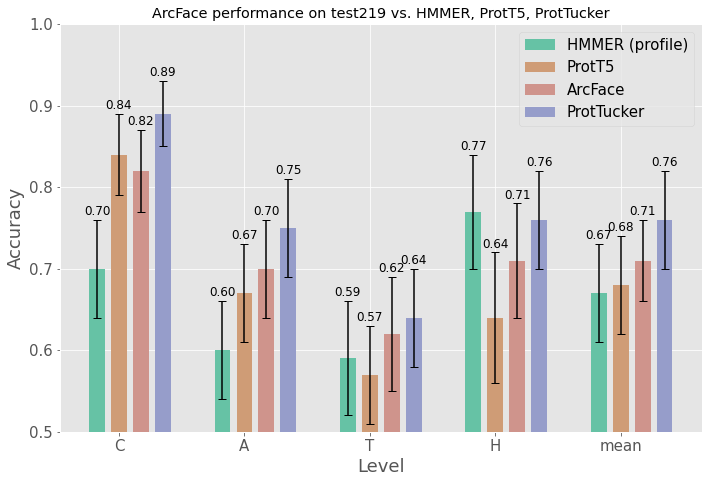

In [34]:
import matplotlib
matplotlib.rcParams.update({"errorbar.capsize": 4})
bar_width = 0.125
space = 0.05
r1 = np.arange(5)
r2 = r1 + bar_width + space
r3 = r2 + bar_width + space
r4 = r3 + bar_width + space
fig = plt.figure(figsize=[11.5, 7.5])

values = {}
for model, title, color, r in zip(
    ["HMMER", "ProtT5", "ArcFace", "ProtTucker"],
    ["HMMER (profile)", "ProtT5", "ArcFace", "ProtTucker"],
    ["#66c2a5", "#cf9c76", "#cf948c", "#969dca"],
    [r1, r2, r3, r4]
):
    values[model] = plt.bar(
        r,
        df.query(f"model == '{model}' and series == 'mean'").values[0][:5],
        yerr=df.query(f"model == '{model}' and series == 'ci'").values[0][:5],
        width=bar_width,
        label=title,
        color=color
    )

plt.gca().set_xlabel("Level", fontsize=18)
plt.gca().set_ylabel("Accuracy", fontsize=18)
plt.title("ArcFace performance on test219 vs. HMMER, ProtT5, ProtTucker")
plt.gca().set_xticks(r2)
plt.gca().set_xticklabels(["C", "A", "T", "H", "mean"], fontsize=15)

for v in values.values():
    plt.gca().bar_label(v, padding=2, fmt="%.2f", fontsize=12)

plt.gca().set_ylim([0.5, 1])
#plt.gca().set_yticklabels(plt.gca().get_yticklabels(), fontsize=15)
plt.yticks(fontsize=15)

plt.legend(loc="upper right", fontsize=15)

#fig.set_size_inches(11.5, 7.5)
#fig.tight_layout()
fig.show()
fig.savefig(get_base_dir() / "src/gobi_cath_classification/contrastive_learning_arcface/arcface_vs_baseline.png", dpi=300)